In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [2]:
data = pd.read_csv('final_database.csv')
new_york = pd.read_csv('new_york_merge.csv')

In [3]:
new_york

,Pop,PCI,cat,price,rating,review
0,8398748,151128,Comfort Food,2,4.0,4132
1,8398748,151128,Barbeque,2,4.0,1349
2,8398748,151128,Shanghainese,2,4.0,6158
3,8398748,151128,Thai,2,4.5,2266
4,8398748,151128,Vietnamese,2,4.0,719
...,...,...,...,...,...,...
219,8398748,151128,Thai,2,4.5,88
220,8398748,151128,Kebab,2,4.5,68
221,8398748,151128,Chinese,2,4.0,646
222,8398748,151128,Mediterranean,2,4.0,246


In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

In [58]:
data

,Unnamed: 0,State,City,Pop,PCI,price,rating,review,Total
0,0,ak,bristol bay borough,877,"116,340",1.500000,3.750000,6.500000,6.0
1,1,ak,sitka city and borough,8647,"66,157",1.933333,3.966667,38.466667,26.0
2,2,ak,matanuska-susitna borough,107610,"45,608",1.894737,3.947368,68.421053,28.0
3,3,ak,kenai peninsula borough,58533,"50,466",2.111111,4.277778,64.166667,45.0
4,4,ak,juneau city and borough,32113,"62,774",1.911765,3.911765,110.058824,94.0
...,...,...,...,...,...,...,...,...,...
1208,1208,wv,mason,938,"28,756",1.083333,3.500000,5.833333,17.0
1209,1209,wv,logan,1511,"32,521",1.222222,4.333333,4.555556,13.0
1210,1210,wv,clay,448,"28,882",1.431818,3.343750,27.431818,635.0
1211,1211,wy,laramie,32473,"49,426",1.566667,3.583333,72.300000,81.0


In [5]:
data['PCI'] = data['PCI'].apply(lambda x: x.replace(',', ''))


In [61]:
data

,Unnamed: 0,State,City,Pop,PCI,price,rating,review,Total
0,0,ak,bristol bay borough,877,116340,1.500000,3.750000,6.500000,6.0
1,1,ak,sitka city and borough,8647,66157,1.933333,3.966667,38.466667,26.0
2,2,ak,matanuska-susitna borough,107610,45608,1.894737,3.947368,68.421053,28.0
3,3,ak,kenai peninsula borough,58533,50466,2.111111,4.277778,64.166667,45.0
4,4,ak,juneau city and borough,32113,62774,1.911765,3.911765,110.058824,94.0
...,...,...,...,...,...,...,...,...,...
1208,1208,wv,mason,938,28756,1.083333,3.500000,5.833333,17.0
1209,1209,wv,logan,1511,32521,1.222222,4.333333,4.555556,13.0
1210,1210,wv,clay,448,28882,1.431818,3.343750,27.431818,635.0
1211,1211,wy,laramie,32473,49426,1.566667,3.583333,72.300000,81.0


In [6]:
data['PCI'] = data['PCI'].astype('int')

In [7]:
data = data.drop('Unnamed: 0', axis=1)

In [65]:
data.dtypes

State      object
City       object
Pop         int64
PCI         int32
price     float64
rating    float64
review    float64
Total     float64
dtype: object

In [69]:
X = data[['price', 'rating', 'review', 'Total', 'Pop']]
y = data['PCI'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1213, 5) (1213, 1)


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [71]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [72]:
# Fit the model to the training data and calculate the scores for the training and testing data


model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)



print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.17570458808639577
Testing Score: 0.10336014855898501


Text(0.5, 1.0, 'Residual Plot')

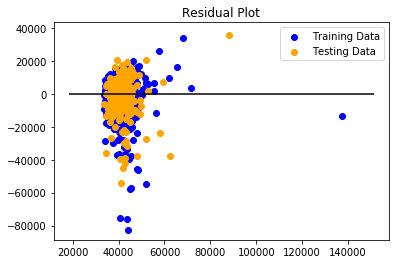

In [73]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [13]:
spa_data.corr()

,Pop,price,rating,review,Total
Pop,1.000000,-0.002532,0.052618,0.444684,0.545553
price,-0.002532,1.000000,-0.036652,-0.005570,0.021049
rating,0.052618,-0.036652,1.000000,0.148415,0.124177
review,0.444684,-0.005570,0.148415,1.000000,0.557204
Total,0.545553,0.021049,0.124177,0.557204,1.000000


In [36]:
spa_data = pd.read_csv('final_spa_database.csv')
hp_spa = pd.read_csv('final_hp_spa.csv')

In [8]:
rest_data = data

In [32]:
high_pop = pd.read_csv('high_pop.csv')
low_pop = pd.read_csv('low_pop.csv')

In [4]:
rest_data

,Unnamed: 0,State,City,Pop,PCI,price,rating,review,Total
0,0,ak,bristol bay borough,877,"116,340",1.500000,3.750000,6.500000,6.0
1,1,ak,sitka city and borough,8647,"66,157",1.933333,3.966667,38.466667,26.0
2,2,ak,matanuska-susitna borough,107610,"45,608",1.894737,3.947368,68.421053,28.0
3,3,ak,kenai peninsula borough,58533,"50,466",2.111111,4.277778,64.166667,45.0
4,4,ak,juneau city and borough,32113,"62,774",1.911765,3.911765,110.058824,94.0
...,...,...,...,...,...,...,...,...,...
1208,1208,wv,mason,938,"28,756",1.083333,3.500000,5.833333,17.0
1209,1209,wv,logan,1511,"32,521",1.222222,4.333333,4.555556,13.0
1210,1210,wv,clay,448,"28,882",1.431818,3.343750,27.431818,635.0
1211,1211,wy,laramie,32473,"49,426",1.566667,3.583333,72.300000,81.0


In [70]:
def ml(data):   

    data = data.drop('Unnamed: 0', axis=1)
    features = ['price', 'rating', 'review', 'Total', 'Pop']
    feature = []
    resultx= []
    tr_score = []
    te_score = []
    for l in features:
        feature.append(l)
        print(feature)
        X = data[feature]
        y = data['PCI'].values.reshape(-1, 1)
   

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

        model = LinearRegression()

        model.fit(X_train, y_train)
        training_score = model.score(X_train, y_train)
        testing_score = model.score(X_test, y_test)
        tr_score.append(training_score)
        te_score.append(testing_score)
        
        results_dict = {'X': feature,
                        'Y': 'PCI',
                       'Training Score': tr_score,
                       'Test Score': te_score}

        print(f"Training Score: {training_score}")
        print(f"Testing Score: {testing_score}")
        
        
    
    

    return results_dict

In [71]:
r = ml(spa_data)

['price']
Training Score: 0.0024684362282696437
Testing Score: 0.004384037729477042
['price', 'rating']
Training Score: 0.004051641240151782
Testing Score: 0.004510318962253956
['price', 'rating', 'review']
Training Score: 0.07727865310375504
Testing Score: 0.07589746021222965
['price', 'rating', 'review', 'Total']
Training Score: 0.10853448855419723
Testing Score: 0.05930652506170442
['price', 'rating', 'review', 'Total', 'Pop']
Training Score: 0.13875941313662454
Testing Score: 0.0777340911169403


In [72]:
r

{'X': ['price', 'rating', 'review', 'Total', 'Pop'],
 'Y': 'PCI',
 'Training Score': [0.0024684362282696437,
  0.004051641240151782,
  0.07727865310375504,
  0.10853448855419723,
  0.13875941313662454],
 'Test Score': [0.004384037729477042,
  0.004510318962253956,
  0.07589746021222965,
  0.05930652506170442,
  0.0777340911169403]}

In [28]:
low_pop.corr()


,Unnamed: 0,Pop,PCI,price,rating,review,Total
Unnamed: 0,1.000000,0.039828,0.057061,-0.147084,-0.044709,0.007884,0.006213
Pop,0.039828,1.000000,0.074652,-0.030749,0.034223,0.072642,0.002351
PCI,0.057061,0.074652,1.000000,0.015186,0.063562,0.181841,0.185507
price,-0.147084,-0.030749,0.015186,1.000000,-0.275278,-0.115913,-0.011781
rating,-0.044709,0.034223,0.063562,-0.275278,1.000000,0.058462,0.085109
review,0.007884,0.072642,0.181841,-0.115913,0.058462,1.000000,0.388180
Total,0.006213,0.002351,0.185507,-0.011781,0.085109,0.388180,1.000000


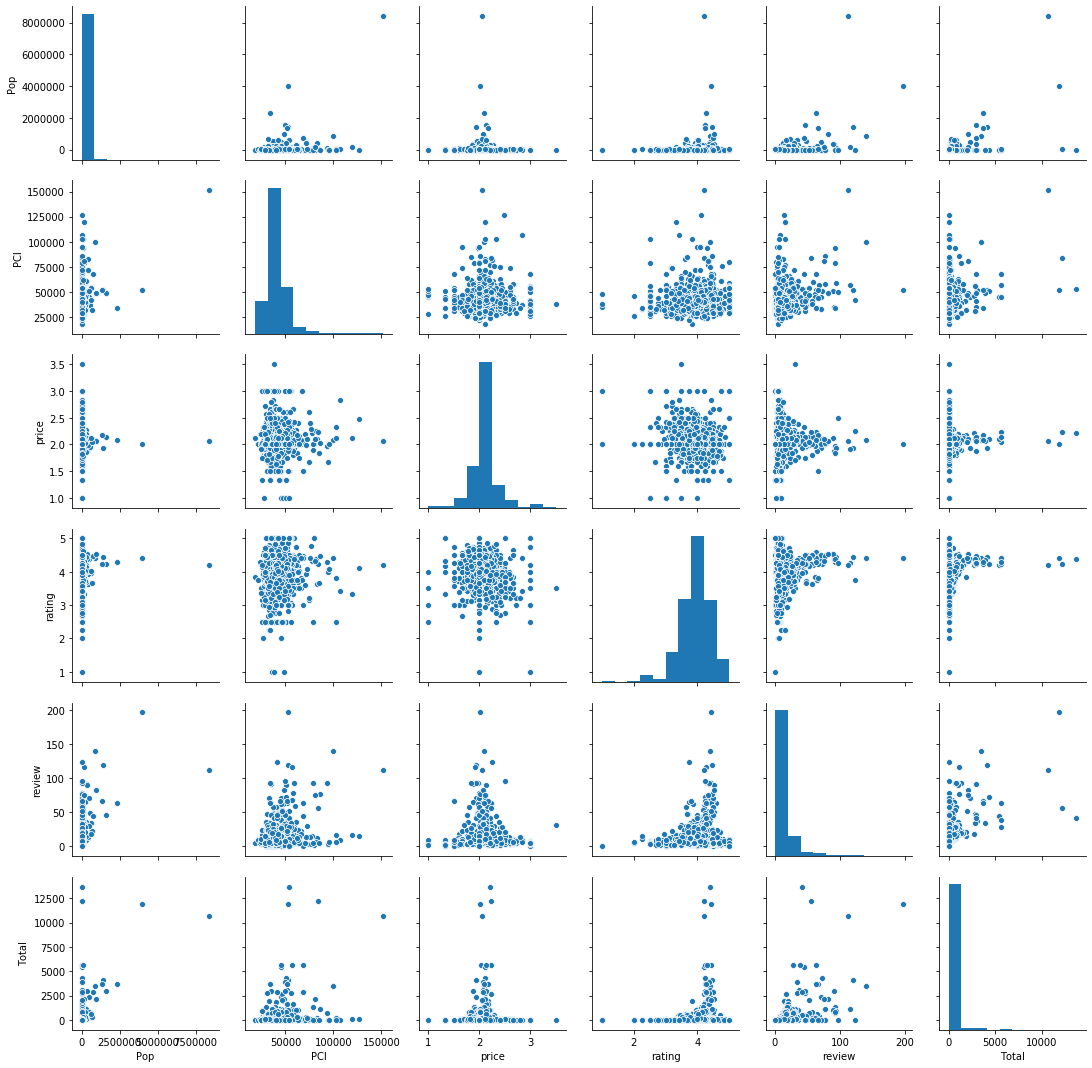

In [35]:
sns.pairplot(spa_data)

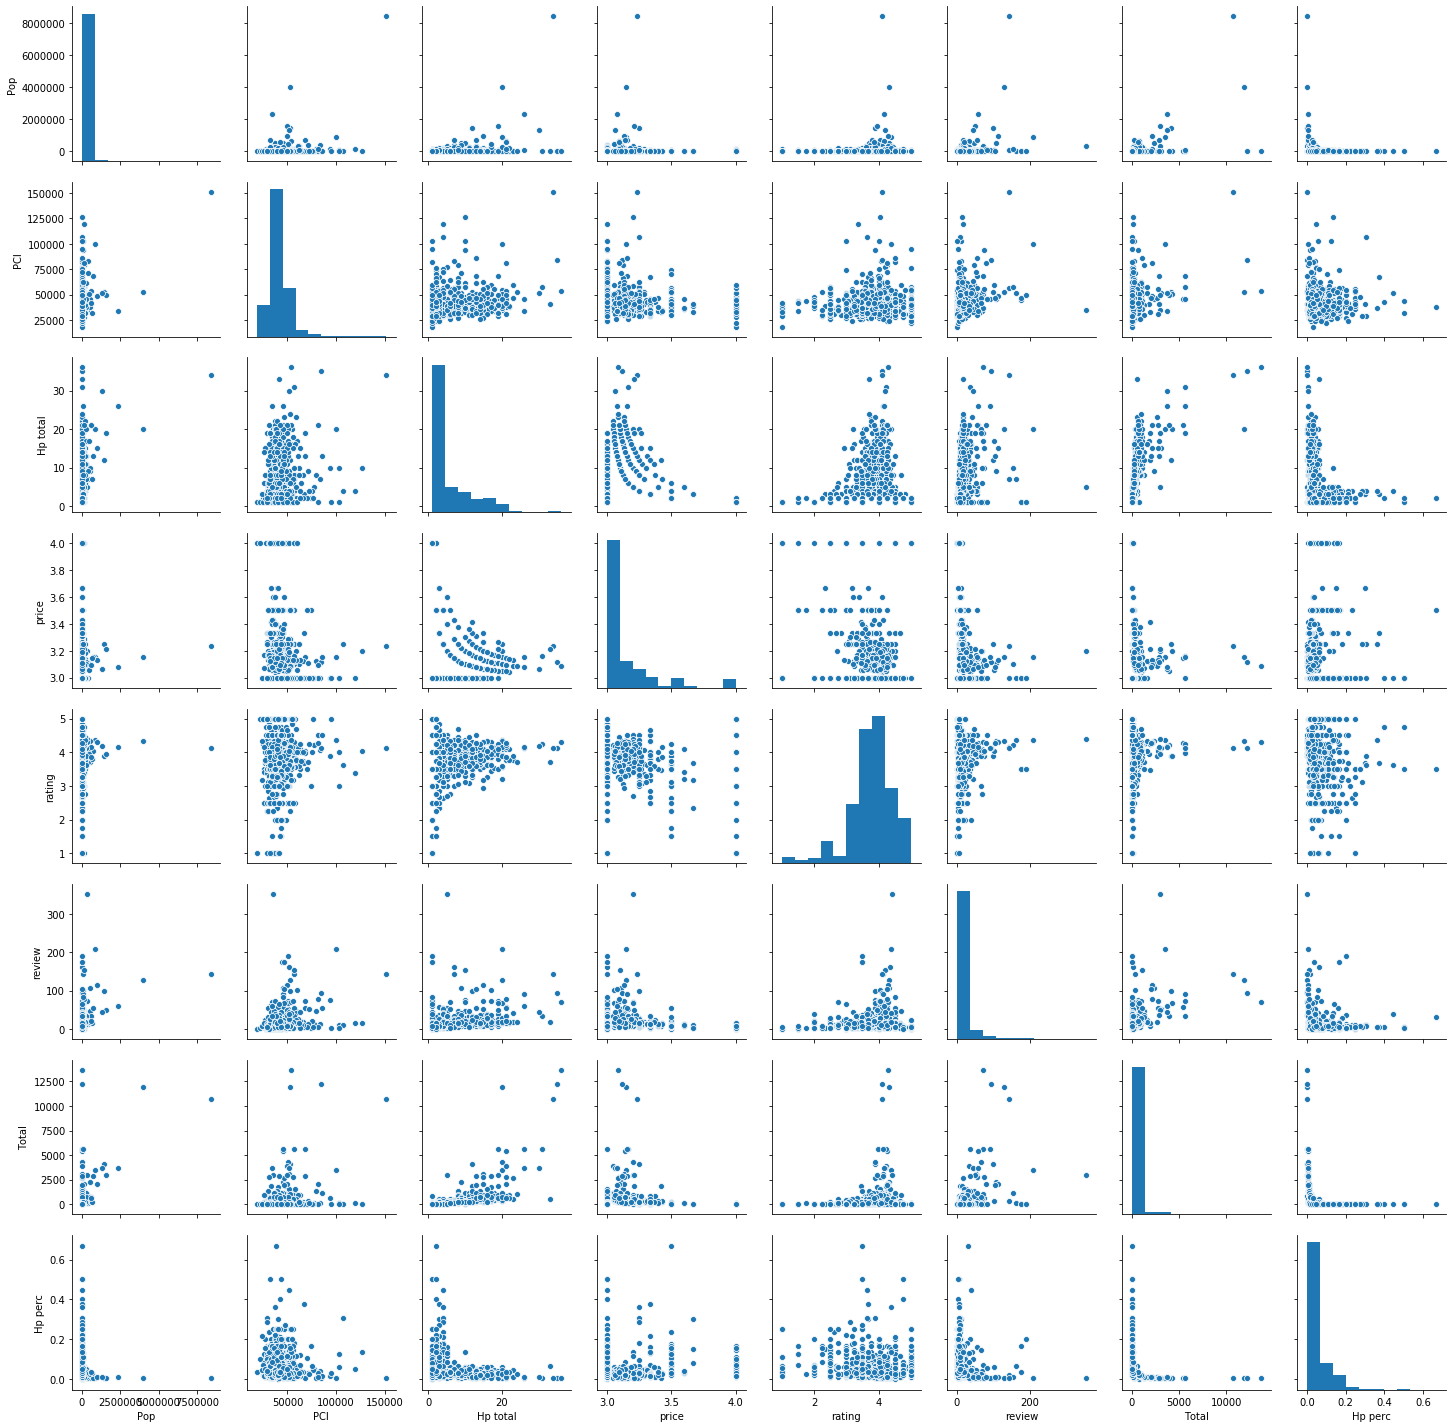

In [28]:
sns.pairplot(hp_spa)

In [36]:
hp_spa.corr()

,Pop,PCI,Hp total,price,rating,review,Total,Hp perc
Pop,1.000000,0.335117,0.283755,0.011522,0.047147,0.329938,0.544304,-0.081728
PCI,0.335117,1.000000,0.223804,0.007615,0.080692,0.278828,0.292688,0.019101
Hp total,0.283755,0.223804,1.000000,-0.020266,0.100456,0.344949,0.625714,-0.285320
price,0.011522,0.007615,-0.020266,1.000000,-0.283317,-0.075178,-0.001816,-0.002555
rating,0.047147,0.080692,0.100456,-0.283317,1.000000,0.097251,0.105131,-0.135713
review,0.329938,0.278828,0.344949,-0.075178,0.097251,1.000000,0.475278,-0.139312
Total,0.544304,0.292688,0.625714,-0.001816,0.105131,0.475278,1.000000,-0.210462
Hp perc,-0.081728,0.019101,-0.285320,-0.002555,-0.135713,-0.139312,-0.210462,1.000000
